In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dynamics of the fire rate
The fire rate until the next spike is\
$\dot{f}(t) = \frac{1}{\tau} (f_0 - f(t))$

Using this we get for $f$:\
$f(t) = f_0 - (f_0 - f(0))\exp(-\frac{t}{\tau})$

Where $f(0)$ is the last spike time

## The Right PDF

Assuming that the probability of not having a spike from `0` to `t` is $Q(t)$:\
$Q(t+\Delta t) = Q(t) (1-f(t)dt)$

This gives\
$Q(t+\Delta t) - Q(t) = -Q(t)f(t) dt$

So $\frac{dQ}{dt} = - Q(t) f(t)$

Which gives\
$Q(t) = Q(0) \exp(-\int_{0}^{t} f(s) ds)$ and $Q(0) = 1$

So\
$U(t) = Q(t) f(t)$ is the probability distribution function we are looking for.

$\int_{0}^{t} f(s) ds = f_0 t + \tau (f(0) - f_0) (1 - \exp(-t/\tau))$

$U(t) = (f_0 + (f(0) - f_0) \exp(-t/\tau)) \exp(-f_0 t - \tau (f(0) - f_0)(1-\exp(-t/\tau))$

In [2]:
def pdf(t: np.ndarray, tau:float = 0.01, f_0:float = 0.01, f0:float = 1.) -> np.ndarray:
    """Return the Probability Distribution Fucntion of spike time intervals
    
    ...
    Parameters
    ----------
    t
        time in seconds
    tau : float, default=0.01
        time constant in seconds
    f_0 : float, default=0.01
        base fire rate of neurons
    f0
        fire rate of neurons at the current time
    
    """
    return (f_0 + (f0 - f_0) * np.exp(-t / tau)) * np.exp(-f_0 * t - tau * (f0 - f_0) * (1 - np.exp(-t / tau)))

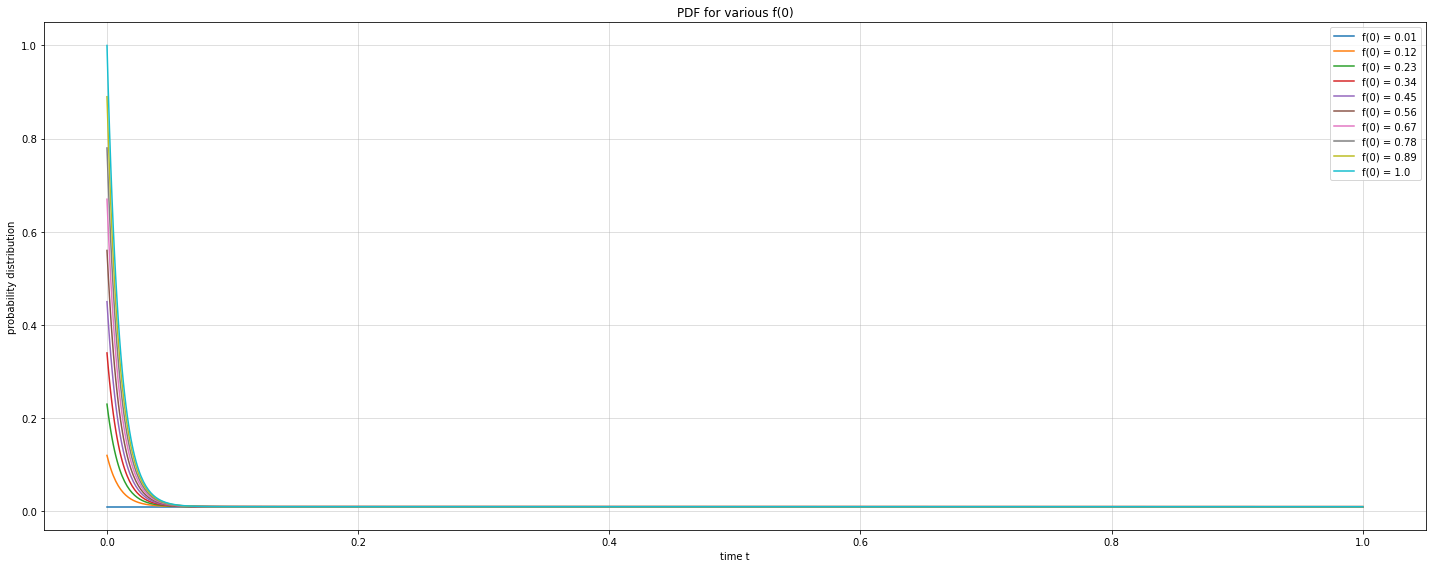

In [3]:
time = np.linspace(0, 1, 1000)

f_zeros = np.linspace(0.01, 1, 10)

fig, ax = plt.subplots(figsize=(20, 8), tight_layout=True)

for f0 in f_zeros:
    ax.plot(time, pdf(t=time, f0=f0), label=f'f(0) = {f0}')

plt.grid(alpha=0.5)
ax.set_xlabel('time t')
ax.set_ylabel("probability distribution")
ax.set_title("PDF for various f(0)")
plt.legend(loc='best')
plt.show()

(500000,)
dt = 0.0010


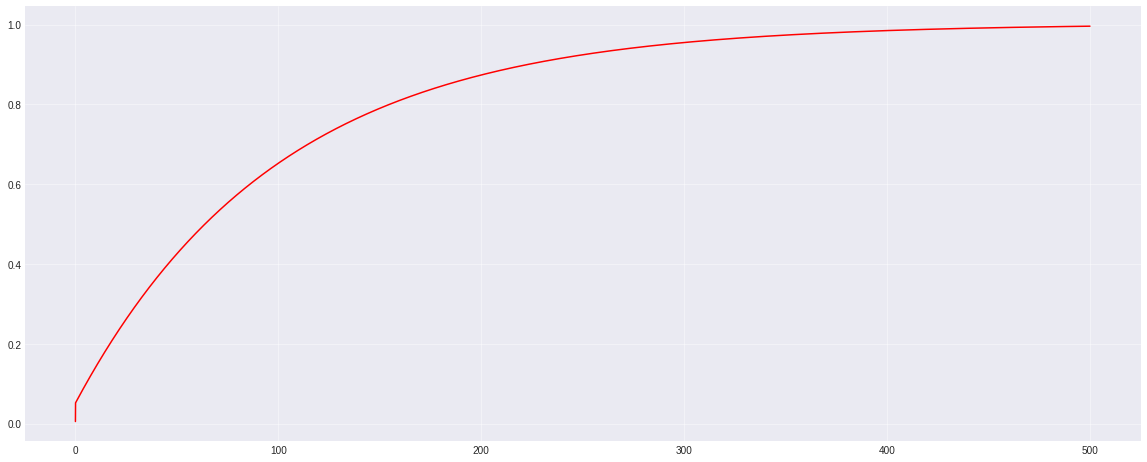

0.9961336507506702


In [6]:
# time_ax = np.linspace(0, 400, 400000)
time_ax = np.arange(0, 500, 1e-3)
print(time_ax.shape)
tau = 0.01
f_0 = 0.01
f0 = 5
isi = pdf(time_ax, tau=tau, f_0=f_0, f0=f0)

dt = time_ax[1] - time_ax[0]
print(f"dt = {dt:.4f}")
cpdf = np.cumsum(isi) * dt

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time_ax, cpdf, 'r-')
plt.grid(alpha=.5)
plt.show()
print(cpdf[-1])

In [5]:
def nearest_value(arr: np.ndarray, value: float):
    """find the index of the nearest value in array to `value`
    Args:
        arr: np.ndarray
            array to find the index in
        value: float
            value to check the nearest values for in `arr`
    
    Returns:
        ind:
            array of indices for the nearest values in `arr`
    """
    ind = np.searchsorted(arr, value, side='left')
    if ind == len(arr):
        return
    
    mask = np.where(np.abs(arr[ind] - value) > np.abs(arr[ind-1] - value))[0]
    if mask:
        return ind-1
    else:
        return ind

/tmp/ipykernel_111055/277248373.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if mask:


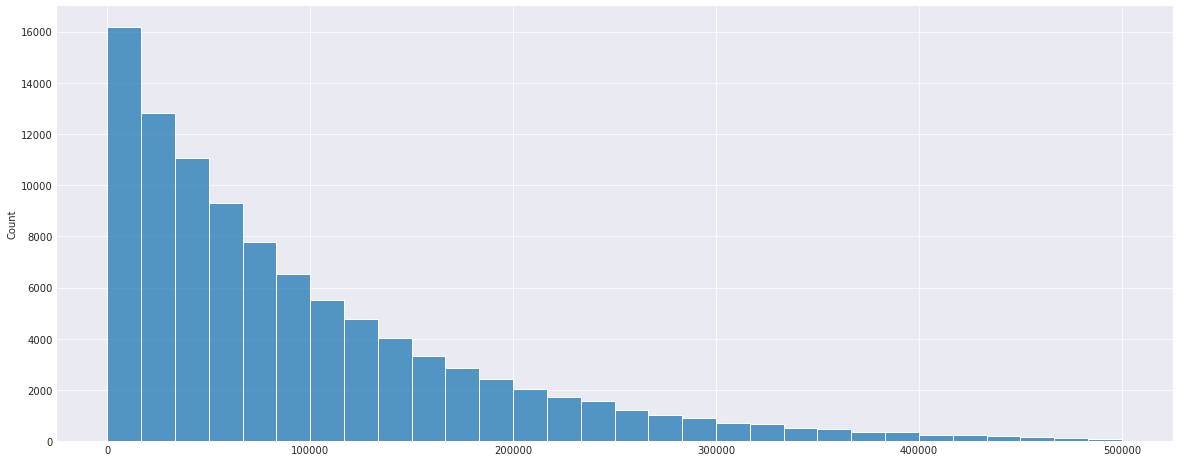

In [6]:
uni = np.random.uniform(0, 1, 100000)

n_val = [nearest_value(cpdf, val) for val in uni]
# print(n_val)
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))
# vals, bins, = ax.hist(n_val, bins=40, density=True)[:-1]
# print(vals, bins)
sns.histplot(n_val, bins=30, stat='count')
# plt.grid(alpha=1)
plt.show()

In [7]:
time_ax = np.arange(0, 500 ,1e-3)
dt = time_ax[1] - time_ax[0]
tau = 0.01
f_0 = 0.01
isi = pdf(time_ax, tau=tau, f_0=f_0, f0=f0)

f0_list = np.arange(0.01, 10, .1)
cpdf_list = []
for f0 in f0_list:
    isi = pdf(time_ax, tau=tau, f_0=f_0, f0=f0)
    cpdf_list.append(np.cumsum(isi) * dt)

np.array(cpdf_list).shape

(100, 500000)